### 1 Setup and Get Data

#### 1.1 Install Dependencies and Setup

#### 1.2 Collect Images Using Opencv

In [1]:
import os

In [2]:
import time

In [3]:
import uuid

In [4]:
import cv2

In [5]:
img_path = os.path.join('data', 'images')

In [6]:
num_images = 50

#### 1.3 Annotate Images with labelme

### 2. Review Dataset and build Image Loading Function

#### 2.1 Import Tensorflow and Deps

In [7]:
import tensorflow as tf

In [8]:
import cv2

In [9]:
import json

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

#### 2.2 Limitr GPU Memory Growth

#### 2.3 load Image into Tensortflow Data Pipeline

In [12]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle = False)

2024-01-03 09:37:27.134659: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-03 09:37:27.134684: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-03 09:37:27.134690: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-03 09:37:27.134725: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-03 09:37:27.134746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
images.as_numpy_iterator().next()

b'data/images/60eb3566-a316-11ee-bb07-76ff19227f5f.jpg'

In [14]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [15]:
images = images.map(load_image)

In [16]:
images.as_numpy_iterator().next()

array([[[206, 202, 193],
        [206, 202, 193],
        [206, 202, 193],
        ...,
        [235, 232, 227],
        [235, 232, 227],
        [235, 232, 227]],

       [[206, 202, 193],
        [205, 201, 192],
        [206, 202, 193],
        ...,
        [235, 232, 227],
        [235, 232, 227],
        [235, 232, 227]],

       [[206, 202, 191],
        [205, 201, 190],
        [205, 201, 192],
        ...,
        [235, 232, 227],
        [235, 232, 227],
        [235, 232, 227]],

       ...,

       [[124, 121, 116],
        [117, 112, 108],
        [ 81,  74,  68],
        ...,
        [ 90,  71,  64],
        [ 88,  69,  62],
        [ 86,  67,  60]],

       [[124, 121, 116],
        [117, 112, 108],
        [ 83,  76,  70],
        ...,
        [ 89,  70,  63],
        [ 86,  67,  60],
        [ 84,  65,  58]],

       [[124, 121, 116],
        [117, 112, 108],
        [ 85,  78,  72],
        ...,
        [ 88,  69,  62],
        [ 85,  66,  59],
        [ 83,  64,  57]]

In [17]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

#### 2.4 View Raw Images with Matrplotlib

In [18]:
image_generator = images.batch(4).as_numpy_iterator()

In [19]:
plot_images = image_generator.next()

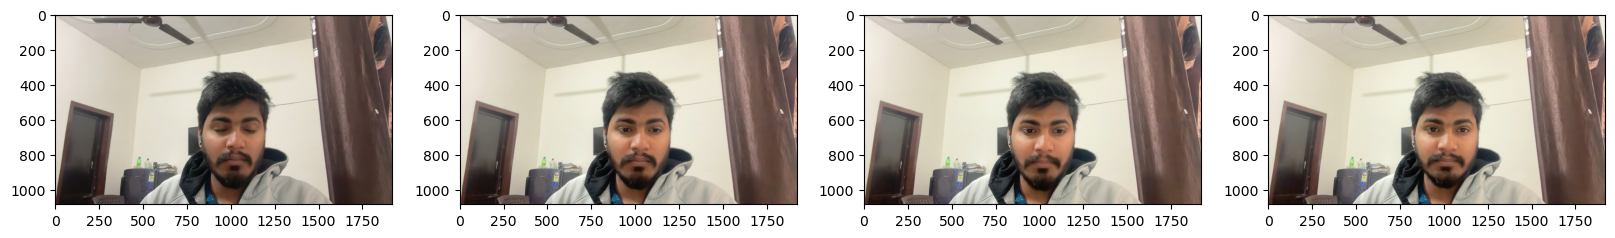

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

### 3. Partition Unaugmented Data

#### 3.1 Manually split Data into Train Test and Val

#### 3.2  Move the Matching Labels

### 4. Apply Image Agumentation on Images and Labels using Albumentations

In [21]:
img = cv2.imread(os.path.join('data', 'train', 'images', '674523fe-a316-11ee-bb07-76ff19227f5f.jpg'))

In [22]:
img.shape

(1080, 1920, 3)

#### 4.1 Setup Albumentations Transform Pipeline

In [23]:
import albumentations as alb

In [24]:
from albumentations import *

In [25]:
import albumentations as alb

augmentor = alb.Compose([
    alb.RandomCrop(width=1080, height=1080),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)],
    
    bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels'])
)

#### 4.2 Load a test Image and Annotation with OpenCV and JSON

In [26]:
img = cv2.imread(os.path.join('data', 'train', 'images', '674523fe-a316-11ee-bb07-76ff19227f5f.jpg'))

In [27]:
img

array([[[196, 208, 214],
        [197, 209, 215],
        [199, 211, 217],
        ...,
        [228, 237, 241],
        [228, 237, 241],
        [228, 237, 241]],

       [[196, 208, 214],
        [198, 210, 216],
        [200, 212, 218],
        ...,
        [227, 236, 240],
        [228, 237, 241],
        [228, 237, 241]],

       [[196, 208, 214],
        [198, 210, 216],
        [201, 213, 219],
        ...,
        [227, 236, 240],
        [228, 237, 241],
        [228, 237, 241]],

       ...,

       [[137, 143, 156],
        [123, 130, 145],
        [ 79,  86, 105],
        ...,
        [ 67,  82, 108],
        [ 68,  83, 109],
        [ 68,  83, 109]],

       [[116, 123, 138],
        [110, 117, 132],
        [ 77,  84, 103],
        ...,
        [ 69,  84, 110],
        [ 70,  85, 111],
        [ 71,  86, 112]],

       [[122, 129, 144],
        [109, 117, 134],
        [ 77,  84, 103],
        ...,
        [ 72,  87, 113],
        [ 73,  88, 114],
        [ 75,  90, 116]]

In [28]:
import os
import json

demo = '/Users/jayeshsingh/Deep Learning/Project/Nicholas renotte yt/02. Face Detection/data/train/labels/69a0dd32-a316-11ee-bb07-76ff19227f5f.json'

# Assuming 'demo' contains the full path, so you don't need to use os.path.join again
with open(demo, 'r') as f:
    label = json.load(f)

In [29]:
label['shapes'][0]['points']

[[904.1176470588235, 345.88235294117646],
 [1345.2941176470588, 987.0588235294118]]

#### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [30]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [31]:
coords

[904.1176470588235, 345.88235294117646, 1345.2941176470588, 987.0588235294118]

In [32]:
coords = list(np.divide(coords, [1920, 1080, 1920, 1080]))

In [33]:
coords

[0.47089460784313725,
 0.3202614379084967,
 0.7006740196078431,
 0.9139433551198257]

#### 4.4 Apply Augumentations and View Resutls

In [34]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [35]:
augmented

{'image': array([[[ 89,  92, 106],
         [ 86,  88,  99],
         [ 81,  81,  93],
         ...,
         [170, 186, 193],
         [171, 184, 192],
         [171, 184, 192]],
 
        [[ 89,  92, 106],
         [ 86,  88,  99],
         [ 81,  81,  93],
         ...,
         [170, 186, 193],
         [171, 184, 192],
         [171, 184, 192]],
 
        [[ 88,  91, 105],
         [ 85,  87,  98],
         [ 80,  80,  92],
         ...,
         [169, 185, 192],
         [171, 184, 192],
         [171, 184, 192]],
 
        ...,
 
        [[157, 176, 184],
         [157, 176, 184],
         [157, 176, 184],
         ...,
         [243, 248, 251],
         [244, 249, 250],
         [247, 252, 253]],
 
        [[157, 176, 184],
         [157, 176, 184],
         [157, 176, 184],
         ...,
         [242, 247, 250],
         [246, 251, 252],
         [246, 251, 252]],
 
        [[157, 176, 184],
         [157, 176, 184],
         [157, 176, 184],
         ...,
         [242, 247,

In [36]:
augmented['image'].shape

(1080, 1080, 3)

In [37]:
augmented['bboxes']

[(0.47233115468409587,
  0.08605664488017428,
  0.8808278867102396,
  0.6797385620915033)]

In [38]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

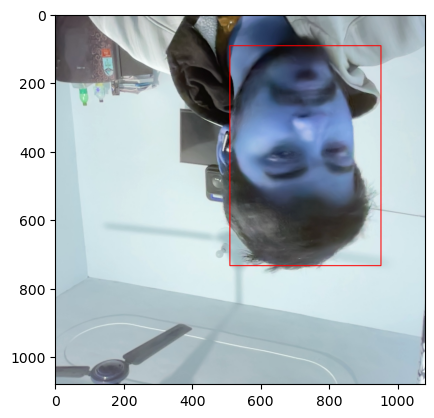

In [39]:
# Draw a rectangle on the image
cv2.rectangle( augmented['image'],   # Image to draw on
    tuple(np.multiply(augmented['bboxes'][0][:2], [1080, 1080]).astype(int)),  # Top-left corner
    tuple(np.multiply(augmented['bboxes'][0][2:], [1080, 1080]).astype(int)),  # Bottom-right corner
    (255, 0, 0), 2)

plt.imshow(augmented['image'])

### 5. Build and Run Augmentation Pipeline

#### 5.1 Run Augmentation Pipeline

In [40]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            
            # Normalize coordinates to the range [0.0, 1.0]
            coords = [
                coords[0] / img.shape[1],
                coords[1] / img.shape[0],
                coords[2] / img.shape[1],
                coords[3] / img.shape[0]
            ]

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
image must be numpy array type


#### 5.2 Load Augmented Images to Tensorflow Dataset

In [41]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x:tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x/255)

In [42]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x:tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/255)

In [43]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x:tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x/255)

In [44]:
train_images.as_numpy_iterator().next()

array([[[0.7294118 , 0.5921569 , 0.58431375],
        [0.73333335, 0.59607846, 0.5803922 ],
        [0.7254902 , 0.5921569 , 0.58431375],
        ...,
        [0.8352941 , 0.6901961 , 0.654902  ],
        [0.8392157 , 0.69411767, 0.6627451 ],
        [0.83137256, 0.69411767, 0.67058825]],

       [[0.7254902 , 0.5921569 , 0.58431375],
        [0.70980394, 0.5882353 , 0.5764706 ],
        [0.70980394, 0.5882353 , 0.5764706 ],
        ...,
        [0.8392157 , 0.69411767, 0.6627451 ],
        [0.8392157 , 0.69411767, 0.65882355],
        [0.84313726, 0.70980394, 0.6745098 ]],

       [[0.56078434, 0.43529412, 0.45490196],
        [0.5372549 , 0.4117647 , 0.43137255],
        [0.5372549 , 0.4117647 , 0.43137255],
        ...,
        [0.83137256, 0.69803923, 0.6627451 ],
        [0.8352941 , 0.7019608 , 0.6666667 ],
        [0.8392157 , 0.70980394, 0.6745098 ]],

       ...,

       [[0.41960785, 0.25490198, 0.29411766],
        [0.4392157 , 0.27450982, 0.32156864],
        [0.42745098, 0

### 6. Prepare Labels

#### 6.1 Prepare Labels

In [45]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)
    return [label['class']], label['bbox']

#### 6.2 Load Labels to Tensorflow Dataset

In [46]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [47]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [48]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [49]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3486, 0.2822, 0.839 , 0.9414], dtype=float16))

### 7. Combine label and Image Samples

#### 7.1 Check Partition Lenghts

In [50]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1800, 1800, 840, 840, 840, 840)

#### 7.2 Create Final Datasets (Images/Labels)

In [51]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [52]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [53]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [54]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.     , 0.0697 , 0.3623 , 0.6797 ],
        [0.     , 0.05884, 0.3635 , 0.718  ],
        [0.6753 , 0.0806 , 1.     , 0.6963 ],
        [0.     , 0.02614, 0.3386 , 0.571  ],
        [0.4272 , 0.3147 , 0.9663 , 0.9355 ],
        [0.5933 , 0.4456 , 1.     , 0.9795 ],
        [0.4924 , 0.3203 , 0.901  , 0.914  ],
        [0.5645 , 0.02614, 1.     , 0.571  ]], dtype=float16))

#### 7.3 View Images and Annotations

In [55]:
data_sampels = train.as_numpy_iterator()

In [56]:
res = data_sampels.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


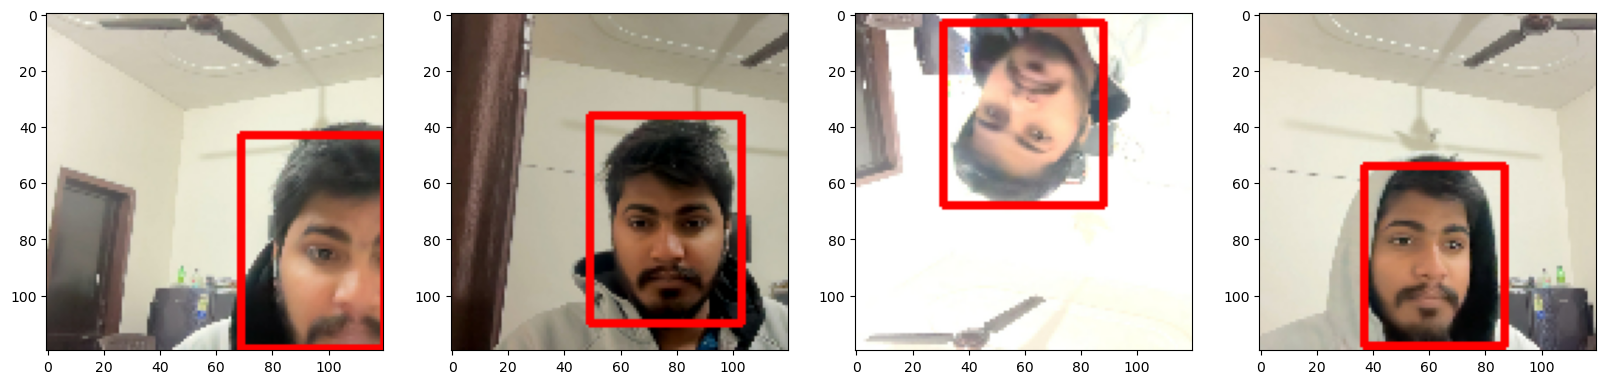

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image  = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                  (255,0,0), 2)
    ax[idx].imshow(sample_image)

### 8. Build Deep Learning using the Functional API

#### 8.1 Import Layers and Base Network

In [58]:
from tensorflow.keras.models import Model

In [59]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D, ReLU

In [60]:
from tensorflow.keras.applications import VGG16

#### 8.1 Download VGG16

In [61]:
 vgg = VGG16(include_top=False)

In [62]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

#### 8.3 Build instance of Network

In [63]:
def build_model():
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Regression Model (BBox)
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2049, activation='relu')(f1)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [64]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.000e+00, 7.513e-02, 4.573e-01, 6.309e-01],
        [3.647e-01, 7.513e-02, 8.276e-01, 6.309e-01],
        [6.519e-01, 2.930e-01, 1.000e+00, 9.355e-01],
        [4.009e-01, 2.069e-02, 9.512e-01, 5.547e-01],
        [1.957e-01, 4.794e-02, 6.641e-01, 6.743e-01],
        [0.000e+00, 9.260e-04, 4.192e-01, 6.035e-01],
        [4.766e-01, 4.238e-01, 9.502e-01, 8.975e-01],
        [2.803e-01, 3.857e-01, 6.831e-01, 9.414e-01]], dtype=float16))

#### 8.4 Test out Neural Network

In [65]:
facetracker = build_model()

In [66]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [67]:
x, y = train.as_numpy_iterator().next()

In [68]:
x.shape

(8, 120, 120, 3)

In [69]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[3.774e-01, 3.748e-01, 8.662e-01, 9.990e-01],
        [4.749e-01, 3.694e-01, 9.380e-01, 9.248e-01],
        [5.977e-01, 3.040e-01, 1.000e+00, 9.248e-01],
        [4.507e-01, 9.260e-04, 1.000e+00, 6.362e-01],
        [4.272e-01, 3.147e-01, 9.663e-01, 9.355e-01],
        [3.613e-01, 7.513e-02, 8.135e-01, 6.963e-01],
        [0.000e+00, 3.801e-01, 3.674e-01, 9.902e-01],
        [0.000e+00, 2.930e-01, 3.594e-01, 9.355e-01]], dtype=float16))

In [70]:
classes, coords = facetracker.predict(x)

1/1 [==============================] - 0s 236ms/step


2024-01-03 09:38:17.625079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [71]:
classes

array([[0.64954907],
       [0.66998774],
       [0.7113033 ],
       [0.72242254],
       [0.6567823 ],
       [0.53390455],
       [0.6625052 ],
       [0.65466905]], dtype=float32)

In [72]:
coords

array([[0.67952436, 0.751067  , 0.5438528 , 0.21537061],
       [0.66432613, 0.6629623 , 0.59075   , 0.2867426 ],
       [0.6073073 , 0.6448603 , 0.48844635, 0.29604048],
       [0.57662594, 0.6712439 , 0.54017353, 0.2021272 ],
       [0.73874724, 0.704221  , 0.6408614 , 0.18432696],
       [0.7167321 , 0.73939955, 0.5023083 , 0.1147071 ],
       [0.5721798 , 0.83691996, 0.51103276, 0.18511873],
       [0.68376076, 0.70193624, 0.39051276, 0.22803208]], dtype=float32)

### 9. Define Looses and Optimizers

#### 9.1 Define optimizer and LR

In [73]:
len(train)

225

In [74]:
batches_per_epoch = 225

In [75]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

#### 9.2 Create Localization Loss and Classification Loss

In [76]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [77]:
classloss = tf.keras.losses.BinaryCrossentropy()

In [78]:
regressloss = localization_loss

#### 9.3 Test out Loss Metrics

In [79]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=15.74311>

In [80]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.42263323>

In [81]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=15.74311>

### 10. Train Neural network

#### 10.1 Create a Custom Model Class

In [82]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        x, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(x, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        x, y = batch
        
        classes, coords = self.model(x, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, x, **kwargs): 
        return self.model(x, **kwargs)

In [83]:
model = FaceTracker(facetracker)

In [84]:
model.compile(opt, classloss, regressloss)

#### 10.2 Train

In [85]:
logdir='logs'

In [86]:
ternsorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [87]:
history = model.fit(train.take(100), epochs=3, validation_data=(val), 
                    callbacks=[ternsorboard_callback])

Epoch 1/3


2024-01-03 09:38:19.989265: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


100/100 [==============================] - 39s 308ms/step - total_loss: 0.6563 - class_loss: 0.0284 - regress_loss: 0.6421 - val_total_loss: 0.1144 - val_class_loss: 7.9134e-04 - val_regress_loss: 0.1140
Epoch 2/3
100/100 [==============================] - 36s 304ms/step - total_loss: 0.1275 - class_loss: 1.5646e-04 - regress_loss: 0.1274 - val_total_loss: 0.1183 - val_class_loss: 1.3996e-04 - val_regress_loss: 0.1182
Epoch 3/3
100/100 [==============================] - 36s 311ms/step - total_loss: 0.0930 - class_loss: 0.0128 - regress_loss: 0.0866 - val_total_loss: 0.1408 - val_class_loss: 3.2723e-04 - val_regress_loss: 0.1407


In [88]:
import pandas as pd

In [89]:
history = pd.DataFrame(history.history)

#### 10.3 Plot Performance

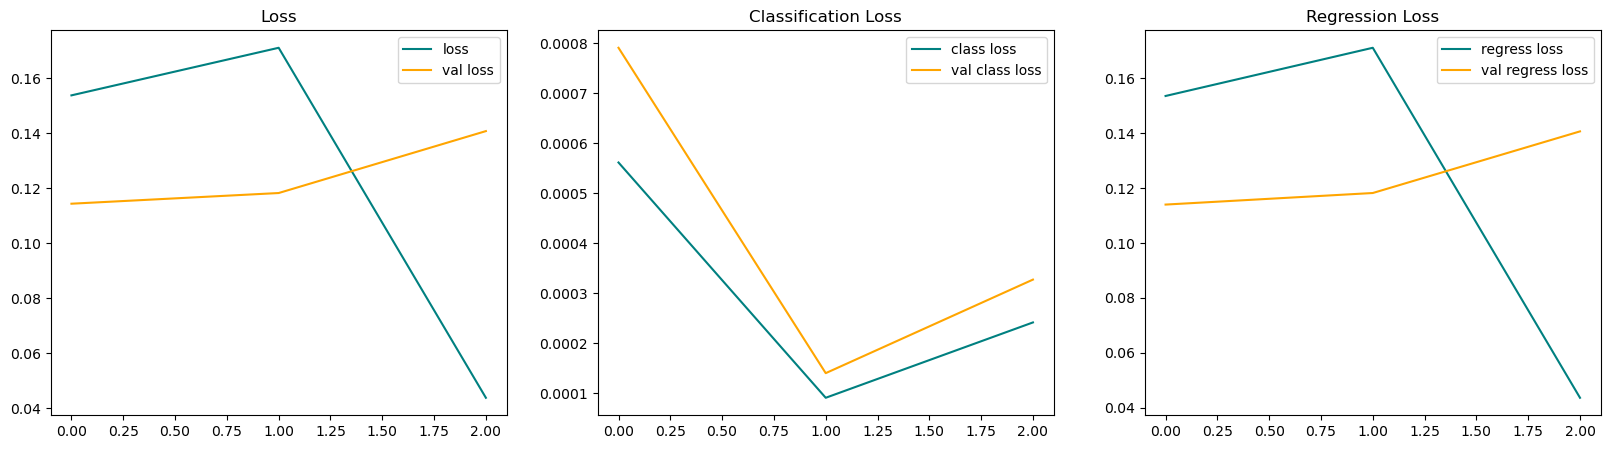

In [90]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history['total_loss'], color='teal', label='loss')
ax[0].plot(history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history['class_loss'], color='teal', label='class loss')
ax[1].plot(history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

### 11. Make Predictions

#### 11.1 make predictions on Test Set

In [91]:
test_data = test.as_numpy_iterator()

In [92]:
test_sample = test_data.next()

In [93]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 24ms/step


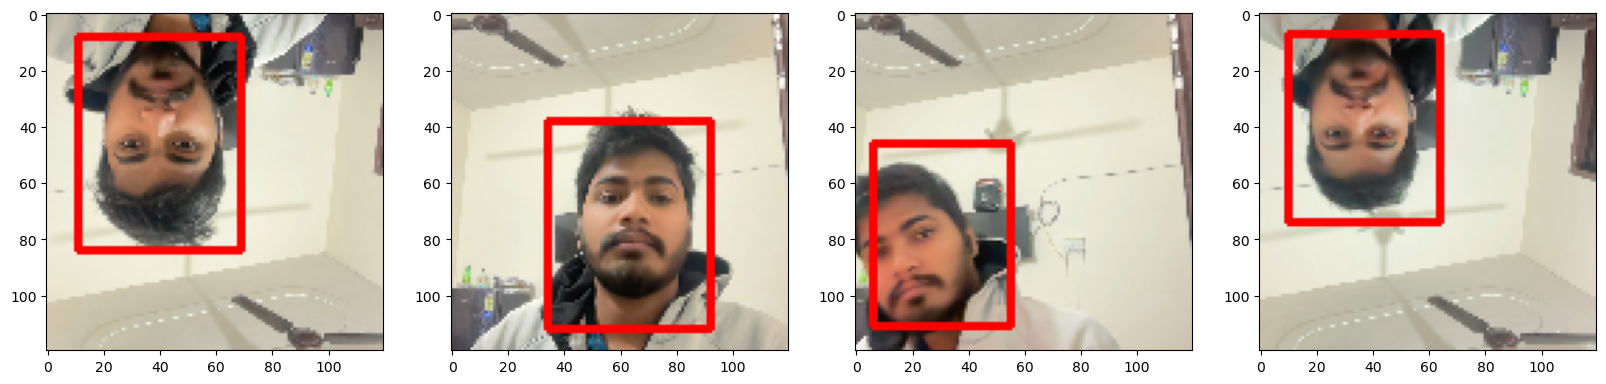

In [94]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

#### 11.2 Save the Model

In [95]:
from tensorflow.keras.models import load_model

In [96]:
facetracker.save('facetracker.h5')

/Users/jayeshsingh/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
facetracker = load_model('facetracker.h5')

#### 11.3 Real Time Detection

In [98]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (120, 120))

        yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
        sample_coords = yhat[1][0]

        if yhat[0] > 0.5:
            # Controls the main rectangle
            cv2.rectangle(frame,
                          tuple(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [frame.shape[1], frame.shape[0]]).astype(int)),
                          (255, 0, 0), 2)
            # Controls the label rectangle
            cv2.rectangle(frame,
                          tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int),
                                        [0, -30])),
                          tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int),
                                        [80, 0])),
                          (255, 0, 0), -1)

            # Controls the text rendered
            cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int),
                                                   [0, -5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('EyeTrack', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 13ms/step
